### Redes Neurais e Aprendizado Profundo
#### **MBA em Ciências de Dados**

### Módulo 5 - Redes neurais para dados sequenciais

#### <span style="color:darkred">**Mecanismo de atenção**</span>

Moacir Antonelli Ponti

---

In [ ]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed
import random

In [ ]:
def modelo_denso(input_shape):
    inputs = layers.Input(shape=(input_shape,))

    # Atenção baseada em softmax
    attention_probs = layers.Dense(input_shape, activation='softmax',
                                   name='attention_vec')(inputs)

    attention_mul = layers.Multiply(name='attention_mul')([inputs,
                                                           attention_probs])
    # Fim da camada de atencao

    attention_mul = layers.Dense(16)(attention_mul)
    output = layers.Dense(1, activation='sigmoid')(attention_mul)
    model = keras.models.Model(inputs=[inputs], outputs=output)
    return model

In [ ]:
def dados_atencao(N, dim, atencao=(1, 3)):
    x = (np.random.randn(N*dim)*0.25).reshape([N,dim])
    y = np.random.randint(low=0, high=2, size=(N, 1))
    for i,at in enumerate(atencao):
      x[:, at] = ((y[:, 0]*0.5)-0.25) + (np.random.randn(N)*0.1)

    return x, y

Text(0.5, 1.0, '[0]')

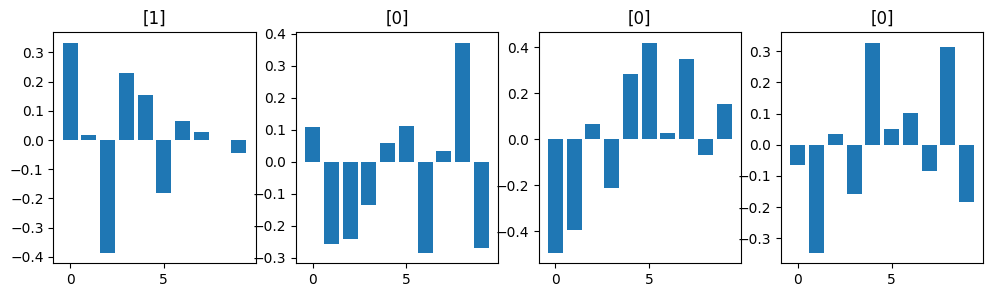

In [ ]:
N = 100
d = 10

seed(10)
train_x, train_y = dados_atencao(N, d)
test_x, test_y = dados_atencao(5, d)
plt.figure(figsize=(12,3))
plt.subplot(141); plt.bar(np.arange(d), train_x[0]); plt.title(train_y[0])
plt.subplot(142); plt.bar(np.arange(d), train_x[1]); plt.title(train_y[1])
plt.subplot(143); plt.bar(np.arange(d), train_x[2]); plt.title(train_y[2])
plt.subplot(144); plt.bar(np.arange(d), train_x[3]); plt.title(train_y[3])

In [ ]:
modelD = modelo_denso(d)
modelD.compile(optimizer='adam', loss='binary_crossentropy',
               metrics=['accuracy'])
print(modelD.summary())

output_att = keras.models.Model(inputs=modelD.input,
                                outputs=modelD.get_layer('attention_vec').output)

output_mul = keras.models.Model(inputs=modelD.input,
                                outputs=modelD.get_layer('attention_mul').output)

1/1 [==============================] - 0s 48ms/step
Vetor de "atencao" = [0.07313    0.12323563 0.11441259 0.09396052 0.07890335 0.11104407
 0.08578157 0.10759716 0.09634164 0.11559344]


<BarContainer object of 10 artists>

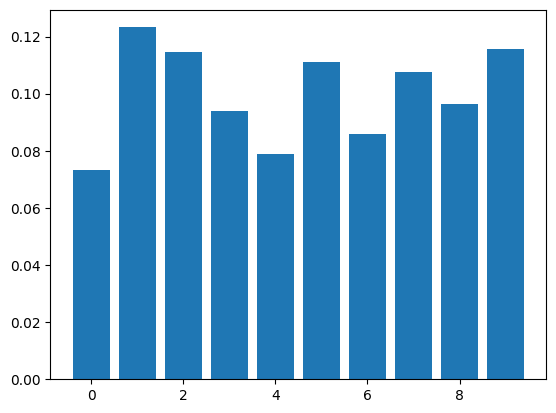

In [ ]:
attention_vector = output_att.predict(test_x)[0]
print('Vetor de "atencao" =', attention_vector)
plt.bar(np.arange(d), attention_vector)

1/1 [==============================] - 0s 53ms/step
Vetor de "atencao" * features = [-0.01122643  0.03469804  0.03551516  0.02143101 -0.00125266  0.01334104
  0.00439272  0.05334779  0.01269396 -0.0312859 ]


<BarContainer object of 10 artists>

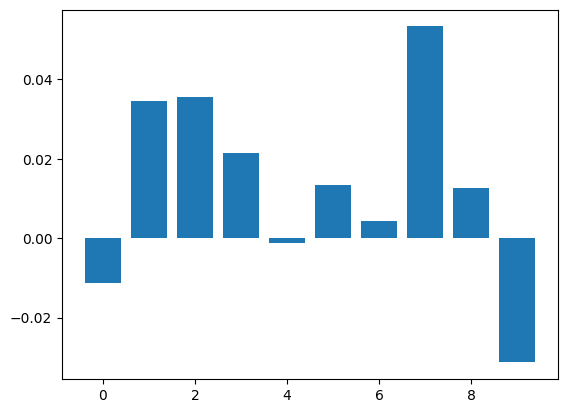

In [ ]:
attention_mul = output_mul.predict(test_x)[0]
print('Vetor de "atencao" * features =', attention_mul)
plt.bar(np.arange(d), attention_mul)

In [ ]:
modelD.fit(train_x, train_y, epochs=100, batch_size=10, verbose=0)
score1 = modelD.evaluate(train_x, train_y,  verbose=0)
print("Acurácia treinamento:", score1[1]*100)

Acurácia treinamento: 100.0


1/1 [==============================] - 0s 39ms/step


Text(0.5, 1.0, 'Vetor atencao ponderado classe [1]')

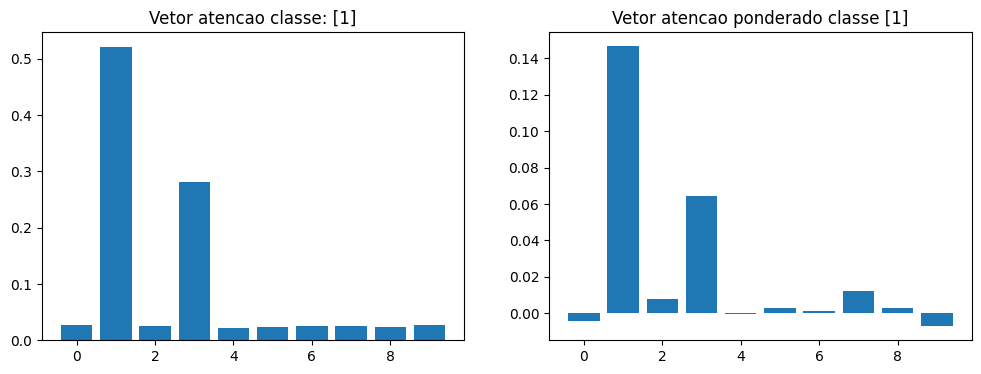

In [ ]:
i = 0
attention_vector = output_att.predict(test_x)[i]
#print('Vetor de "atencao" =', attention_vector)
plt.figure(figsize=(12,4))
plt.subplot(121); plt.bar(np.arange(d), attention_vector); plt.title(f"Vetor atencao classe: {test_y[i]}")
attention_mul = output_mul.predict(test_x)[i]
#print('Vetor de "atencao" ponderado =', attention_mul)
plt.subplot(122); plt.bar(np.arange(d), attention_mul); plt.title(f"Vetor atencao ponderado classe {test_y[i]}")

1/1 [==============================] - 0s 37ms/step


Text(0.5, 1.0, 'Vetor atencao ponderado classe [0]')

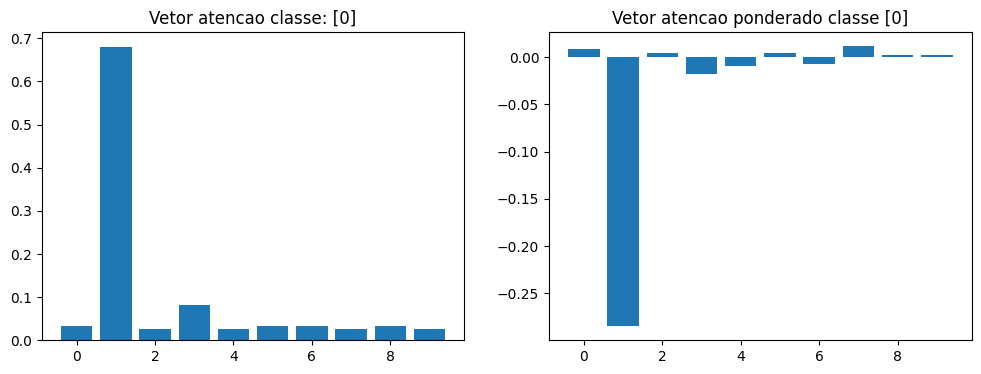

In [ ]:
i = 2
attention_vector = output_att.predict(test_x)[i]
#print('Vetor de "atencao" =', attention_vector)
plt.figure(figsize=(12,4))
plt.subplot(121); plt.bar(np.arange(d), attention_vector); plt.title(f"Vetor atencao classe: {test_y[i]}")
attention_mul = output_mul.predict(test_x)[i]
#print('Vetor de "atencao" ponderado =', attention_mul)
plt.subplot(122); plt.bar(np.arange(d), attention_mul); plt.title(f"Vetor atencao ponderado classe {test_y[i]}")

In [ ]:
score2 = modelD.evaluate(test_x, test_y,  verbose=0)
print("Acurácia teste:", score2[1]*100)

Acurácia teste: 100.0
